### 学习材料
- openai gpt2博客 https://openai.com/index/better-language-models/
- gpt2 论文 https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf
- repo https://github.com/openai/gpt-2
- gpt3 paper more concrete https://arxiv.org/abs/2005.14165

- basic Let's Build GPT：from scratch https://www.youtube.com/watch?v=kCc8FmEb1nY&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=8
-  huggingface transformers https://github.com/huggingface/transformers/blob/main/src/transformers/models/gpt2/modeling_gpt2.py
- huggingface gpt2 https://huggingface.co/openai-community/gpt2


In [1]:
from transformers import GPT2LMHeadModel

### 模型信息
- 124M参数 12Layer 768维dimensions 
- max sequence length 1024

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")#127M
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k,v.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

### embedding
## token embedding
- transformer.wte.weight torch.Size([50257, 768]) 50257个tokens in gpt2 vocabulary,every token is 768 dimensions
- 每一个token都是一小段字符串、一段语言碎片，一个768个数字表示的一个向量

## position embedding
- transformer.wpe.weight torch.Size([1024, 768]) >> look up table for positional embeddings
- gpt2 最大上下文的长度是1024，即可以有1024个位置，每一个位置对应一个固定的768维度的向量用来进行学习优化



In [ ]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]
#.view(-1) 把这个 2D 张量 reshape 成 1D 向量。-1 表示该维度长度由 PyTorch 自动推断，所以结果形状是 [1024*768] = [786432]
#前提：张量在内存中是可 view 的连续布局；否则可能需要 .reshape(-1) 或先 .contiguous()
#[:20]对展平后的 1D 向量做切片，取 前 20 个标量值。

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

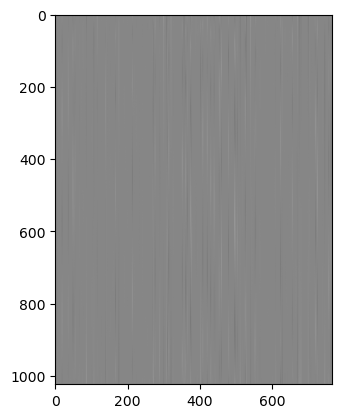

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")
#纵轴表示 从0到1023的1024个位置，横轴表示 每一个位置对应的768个维度
#每个点的灰度代表当前权重的值

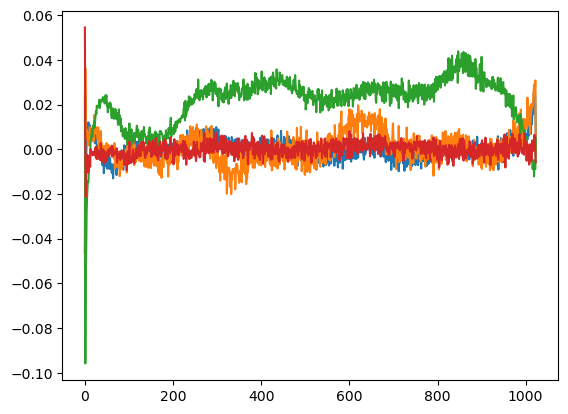

In [ ]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])
plt.plot(sd_hf["transformer.wpe.weight"][:,767])
#对某一列取全部行的值，或者说所有位置的某个channel的值

- 绿线代表了 position 200+ 到900+ 位置 有着高的兴趣值，其他位置较低
- 线的毛刺或者波动代表了模型还欠缺训练，训练的越好的模型走势越光滑。
- 从随机的噪声到平滑的曲线代表了训练的过程。
- attention is all you need 中 position embedding初始化的时候是固定的，使用sin或者cos对应不同的频率？但是在gpt2中是随机初始化的，所以训练的时候会学习到这个位置编码。即最终是经过训练后的position embedding，而不是固定的sin或者cos



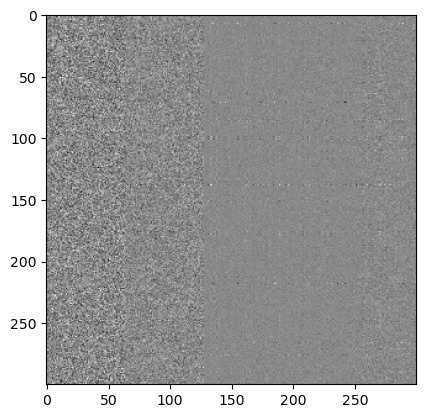

In [ ]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="gray")
#取前300*300的矩阵数据，画图

### Transformer blocks

### 归一化

### 输出